# Travel Insurance Prediction Claim

Oeh : Nadame Kristina Slater Lumban Gaol

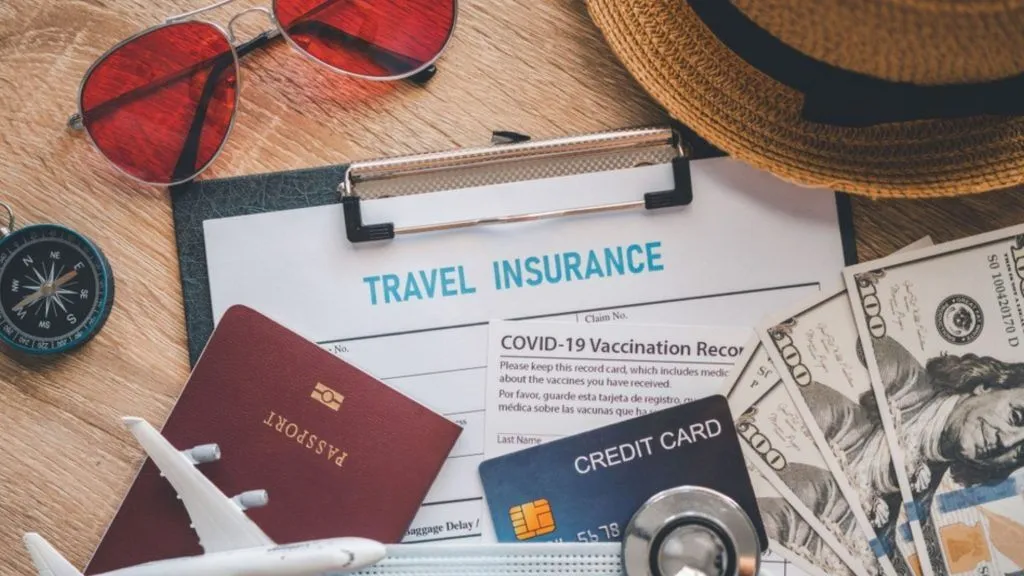

### **Contents**

1. Business Problem Understanding
2. Analytic Approach
3. Metric Evaluation
4. Data Understanding
5. Exploratory Data Analysis
6. Data Preprocessing
7. Modeling and Evaluation
8. Conclusion and Recommendation

### **1. Business Problem Understanding**

**Context**

Asuransi perjalanan adalah jenis asuransi yang memberikan perlindungan selama kita bepergian baik di dalam negeri maupun ke luar negeri. Beberapa negara bahkan mewajibkan wisatawan memiliki asuransi perjalanan, misalnya, negara-negara di Eropa dan Amerika. Jumlah premi tergantung pada cakupan yang diinginkan, perjalanan, dan tujuan perjalanan. Sebuah perusahaan yang bergerak dalam asuransi perjalanan ingin mengetahui siapa saja pemegang polis asuransi yang akan diterima klaim asuransinya. Hal ini akan membantu mengurangi beban, kinerja dan waktu serta kualitas pelayanan penyedia asuransi perjalanan kepada para pelaku perjalanan.

Target:

1: Pemegang polis **mengajukan klaim** terhadap polis asuransi

0: Pemegang polis **tidak mengajukan klaim** terhadap polis asuransiTidak Klaim

**Background Problem**

Perusahaan asuransi perjalanan menghadapi tantangan dalam mengelola banyaknya klaim yang diajukan oleh pemegang polis. Proses verifikasi klaim yang memakan waktu, serta beban kerja yang tinggi terhadap tim operasional, berdampak pada kualitas pelayanan dan efisiensi operasional. Selain itu, tidak semua pemegang polis benar-benar mengajukan klaim, sehingga diperlukan sistem prediksi yang dapat mengidentifikasi pemegang polis yang berpotensi mengajukan klaim. Dengan begitu, perusahaan dapat mengalokasikan sumber daya secara lebih efisien dan proaktif dalam mengelola risiko.

**Stakeholder**

1. Manajemen Perusahaan Asuransi

Ingin meningkatkan efisiensi operasional dan profitabilitas dengan pengelolaan risiko yang lebih baik.

2. Tim Operasional/Klaim

Membutuhkan informasi yang lebih awal tentang kemungkinan pengajuan klaim untuk mengelola beban kerja secara efektif.

**Problem Statement**

1. Perusahaan asuransi perjalanan dapat memprediksi apakah seorang pemegang polis akan mengajukan klaim asuransi atau tidak, berdasarkan data historis dan informasi profil pemegang polis
2. perusahaan juga membutuhkan pemahaman mendalam tentang faktor-faktor apa saja yang paling memengaruhi kemungkinan terjadinya klaim. Tanpa informasi ini, sulit untuk merancang strategi mitigasi risiko, memperbaiki produk, atau melakukan intervensi tepat sasaran.

**Goals**

1. Mengembangkan model prediksi klaim asuransi perjalanan dengan fokus pada recall agar mampu mendeteksi klaim secara optimal.

2. Mengidentifikasi fitur-fitur paling berpengaruh terhadap klaim untuk mendukung pengambilan keputusan bisnis dan pengembangan produk.

### **2. Analytic Approach**

Analisis data ini bertujuan mengembangkan sebuah model klasifikasi untuk memprediksi kemungkinan seorang pemegang polis mengajukan klaim. Model ini akan menggunakan beberapa algoritma klasifikasi, termasuk Logistic Regression, Decision Tree, KNN, Random Forest, XGBoost, AdaBoost, Gradient Boosting dan LightGBM.

### **3. Metric Evaluation**

- True Positive: Calon pelaku perjalanan melakukan Claim dan diprediksi model melakukan Claim
- False Positive: Calon pelaku perjalanan tidak melakukan Claim, namun diprediksi model melakukan Claim
- False Negative: Calon pelaku perjalanan melakukan Claim, namun diprediksi model tidak melakukan Claim
- True Negative: Calon pelaku perjalanan tidak melakukan Claim dan diprediksi model tidak melakukan Claim

False Negative, dapat menyebabkan konsekuensi berupa:
1. Kesiapan operasional rendah yang dapat menyebabkan keterlambatan dalam memproses klaim.

2. Pengelolaan risiko buruk dapat berupa gagalnya mengantisipasi potensi kerugian finansial dari klaim tersebut.

3. Dapat memengaruhi cash flow jika banyak klaim besar yang tidak terprediksi.

False Positive, dapat menyebabkan konsekuensi berupa:
1. Inefisiensi sumber daya (Tim operasional mengalokasikan waktu dan tenaga untuk memantau kasus yang sebenarnya tidak butuh perhatian)

2. Perusahaan bisa jadi terlalu konservatif dalam penetapan premi atau cadangan klaim, sehingga menurunkan potensi keuntungan.


Berdasarkan konsekuensi di atas False Negative berdampak lebih serius karena dapat menyebabkan kerugian langsung dan menurunkan kualitas layanan. Idealnya, model harus meminimalkan kedua kesalahan ini, tetapi False Negative biasanya dianggap lebih berisiko dalam konteks asuransi. Jadi metric utama yang akan kita gunakan adalah recall score.

In [253]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
# pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',500)
pd.set_option('display.max_colwidth', 200)
from scipy.stats import normaltest

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile

# Imbalance Dataset
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Modeling 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb

# Evaluation
from sklearn.model_selection import cross_validate,GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer,fbeta_score,recall_score, precision_score, balanced_accuracy_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay, precision_recall_curve

import pickle

### **4. Data Understanding**

In [55]:
df=pd.read_csv('data_travel_insurance.csv')
display(df.head(),df.tail())

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No
44327,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,172,SINGAPORE,0.0,17.82,31,No


In [56]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Gender', 'Duration', 'Destination', 'Net Sales',
       'Commision (in value)', 'Age', 'Claim'],
      dtype='object')

**Features Information**

| Feature                  | Description                                             |
|--------------------------|---------------------------------------------------------|
| Agency                   | Name of agency                                          |
| Agency Type              | Type of travel insurance agencies                       |
| Distribution Channel     | Channel of travel insurance agencies                    |
| Product Name             | Name of the travel insurance products                   |
| Gender                   | Gender of the insured                                   |
| Duration                 | Duration of travel                                      |
| Destination              | Destination of travel                                   |
| Net Sales                | Amount of sales of travel insurance policies            |
| Commission (in value)    | Commission received for travel insurance agency         |
| Age                      | Age of the insured                                      |
| Claim                    | Claim status|

In [58]:
#Jumlah baris dan kolom pada dataset
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (44328, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


#### **5. Exploratory Data Analysis**

**5.1 Distribusi fitur numerik**

In [61]:
# Distribusi fitur numerik
df_numeric=df[['Age', 'Duration', 'Net Sales', 'Commision (in value)']]
df_numeric.describe()

,Age,Duration,Net Sales,Commision (in value)
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,39.925600,49.424292,40.550948,9.707692
std,13.954926,109.153961,48.661970,19.625637
min,0.000000,-1.000000,-357.500000,0.000000
25%,35.000000,9.000000,18.000000,0.000000
50%,36.000000,22.000000,26.500000,0.000000
75%,43.000000,53.000000,48.000000,11.550000
max,118.000000,4881.000000,810.000000,283.500000


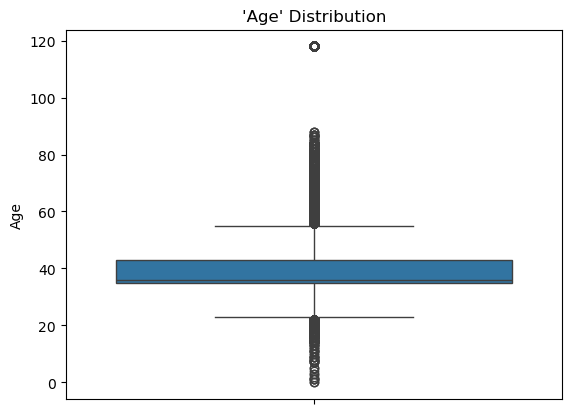

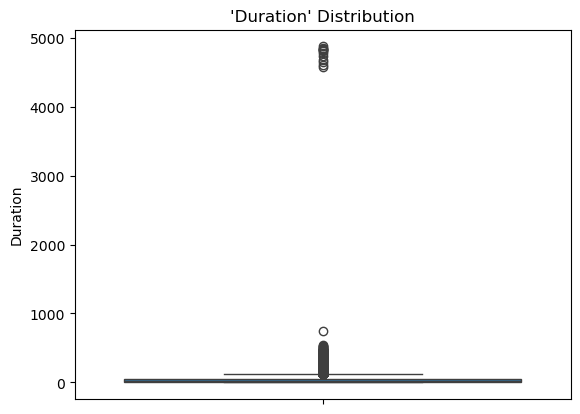

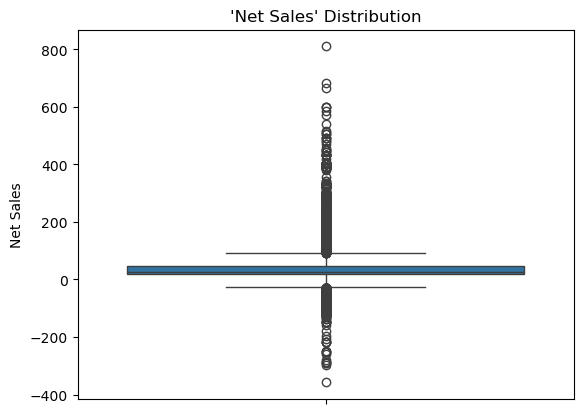

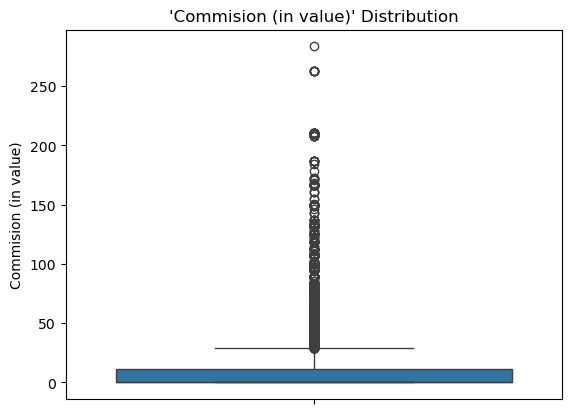

In [62]:
# Distribusi fitur numerik dalam boxplot
for x in df_numeric.columns:
    sns.boxplot(df_numeric[x])
    plt.title(f"'{x}' Distribution")
    plt.show()

**5.2 Distribusi fitur kategorikal**

In [64]:
# Distribusi fitur kategorikal
df_categorical = ['Agency', 'Agency Type', 'Distribution Channel', 'Gender', 'Product Name', 'Destination']
for col in df_categorical:
    print(f"\n{col}:\n", df[col].value_counts())


Agency:
 Agency
EPX    24656
CWT     5980
C2B     5753
JZI     4433
SSI      765
JWT      522
RAB      513
LWC      455
TST      354
KML      281
ART      229
CCR      126
TTW       69
CBH       69
CSR       68
ADM       55
Name: count, dtype: int64

Agency Type:
 Agency Type
Travel Agency    32113
Airlines         12215
Name: count, dtype: int64

Distribution Channel:
 Distribution Channel
Online     43572
Offline      756
Name: count, dtype: int64

Gender:
 Gender
M    6504
F    6177
Name: count, dtype: int64

Product Name:
 Product Name
Cancellation Plan                       12979
2 way Comprehensive Plan                 9341
Rental Vehicle Excess Insurance          5980
Basic Plan                               3834
Bronze Plan                              2847
1 way Comprehensive Plan                 2336
Value Plan                               1907
Silver Plan                              1552
Annual Silver Plan                        975
Ticket Protector                       

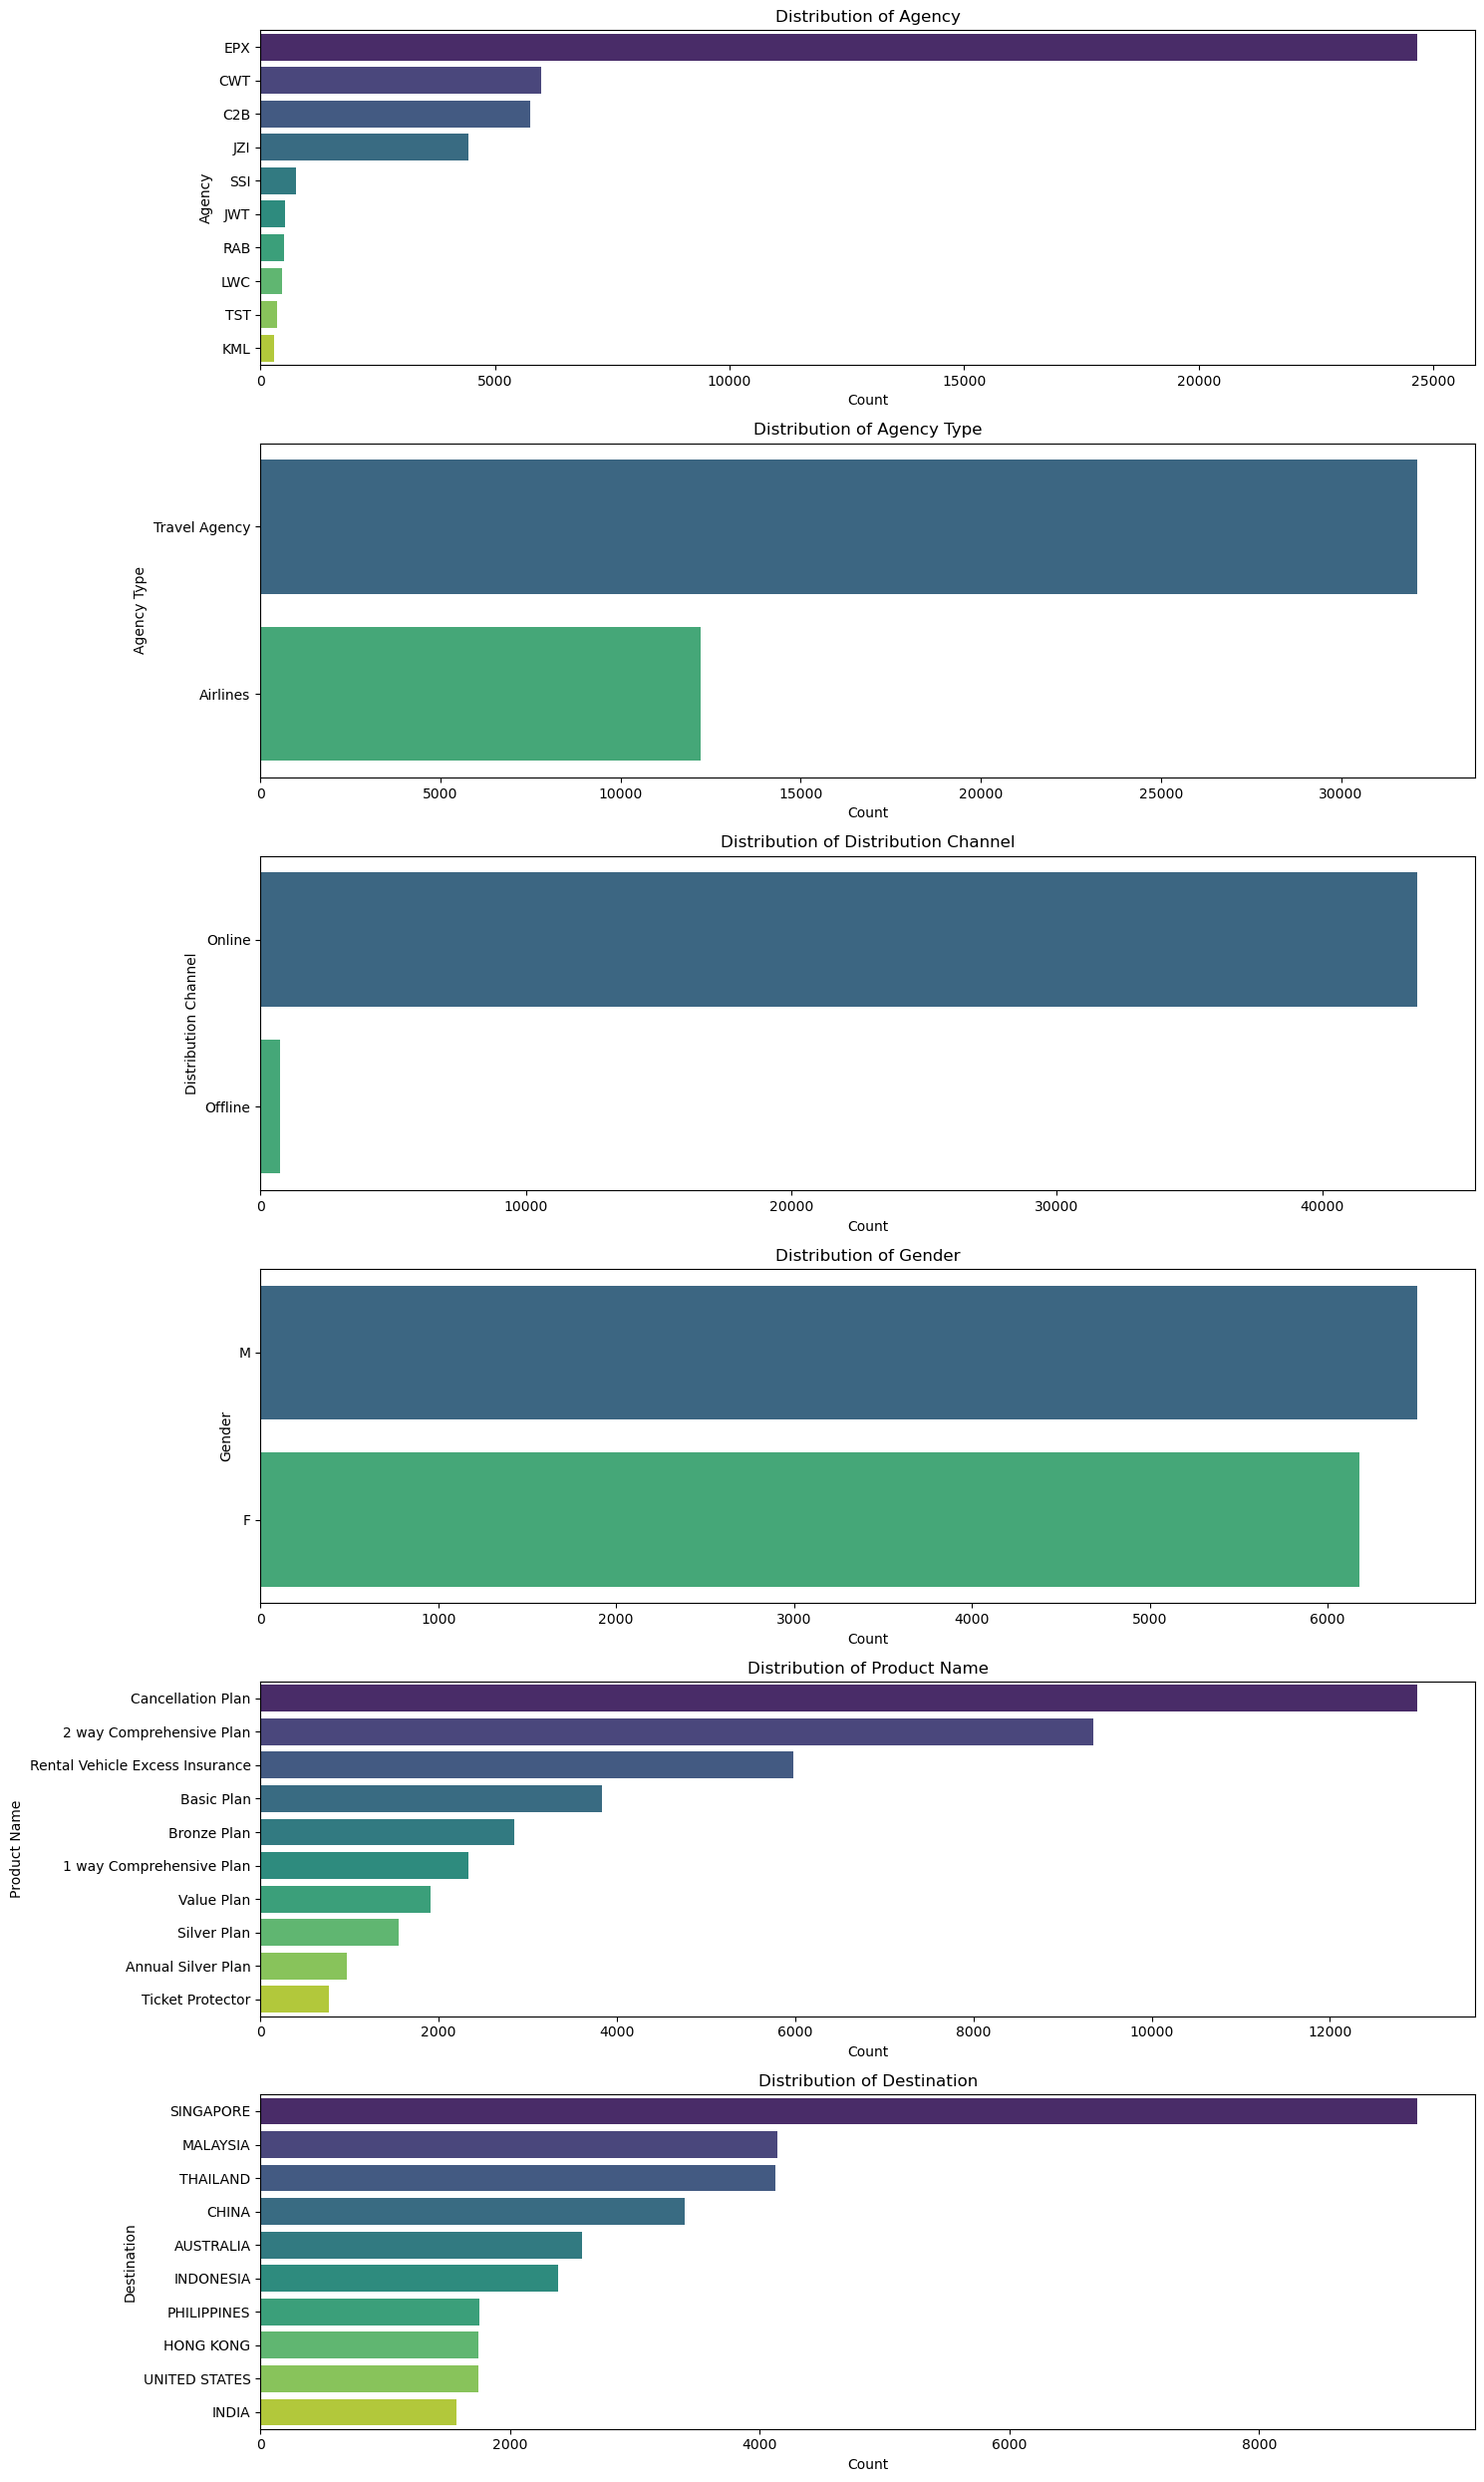

In [65]:
# Distribusi fitur kategorikal dalam bar chart
plt.figure(figsize=(15, 25))
for i, col in enumerate(df_categorical, 1):
    plt.subplot(len(df_categorical), 1, i)  # Atur subplot
    sns.countplot(data=df, y=col, order=df[col].value_counts().sort_values(ascending = False).head(10).index, palette='viridis')  # Bar chart horizontal
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()

plt.show()

**5.3 EDA Multivariate (Numerical-Label)**

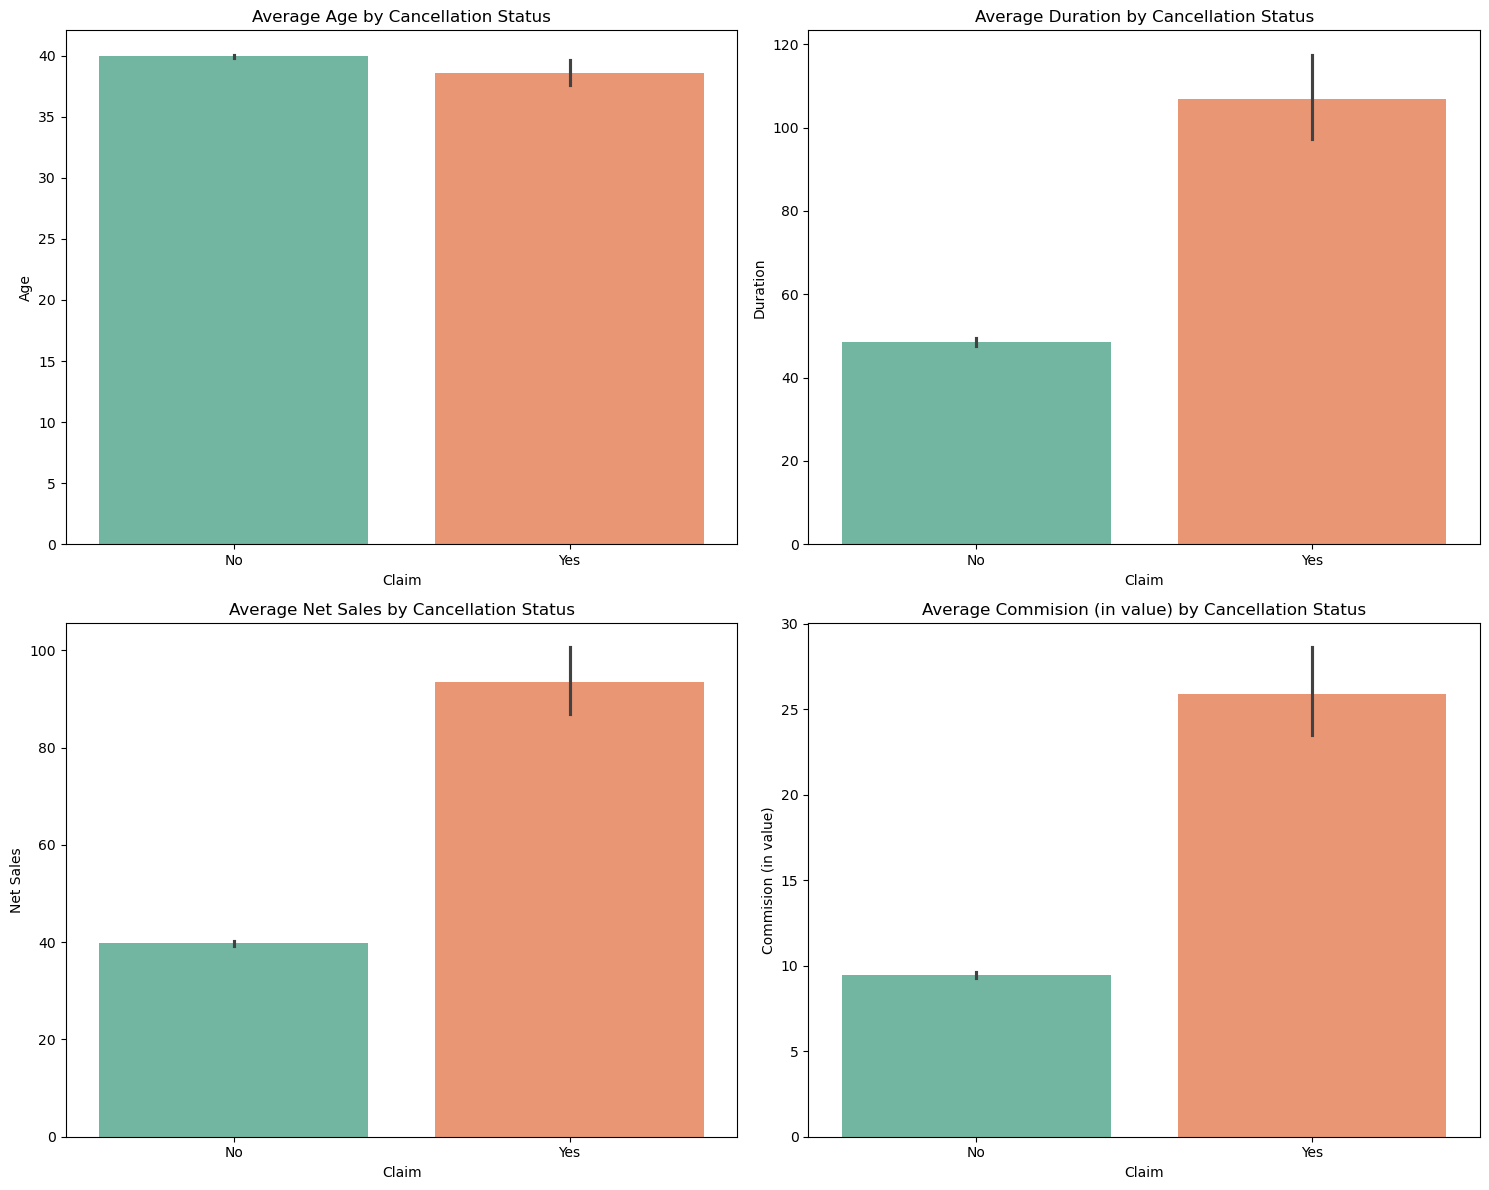

In [67]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Visualisasi distribusi fitur numerik berdasarkan status klaim asuransi perjalanan
for i, col in enumerate(df_numeric):
    sns.barplot(data=df, x='Claim', y=col, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Average {col} by Cancellation Status')
    axes[i].set_xlabel('Claim')
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()

**5.4 EDA Multivariate (Categorical-Label)**

IndexError: index 5 is out of bounds for axis 0 with size 5

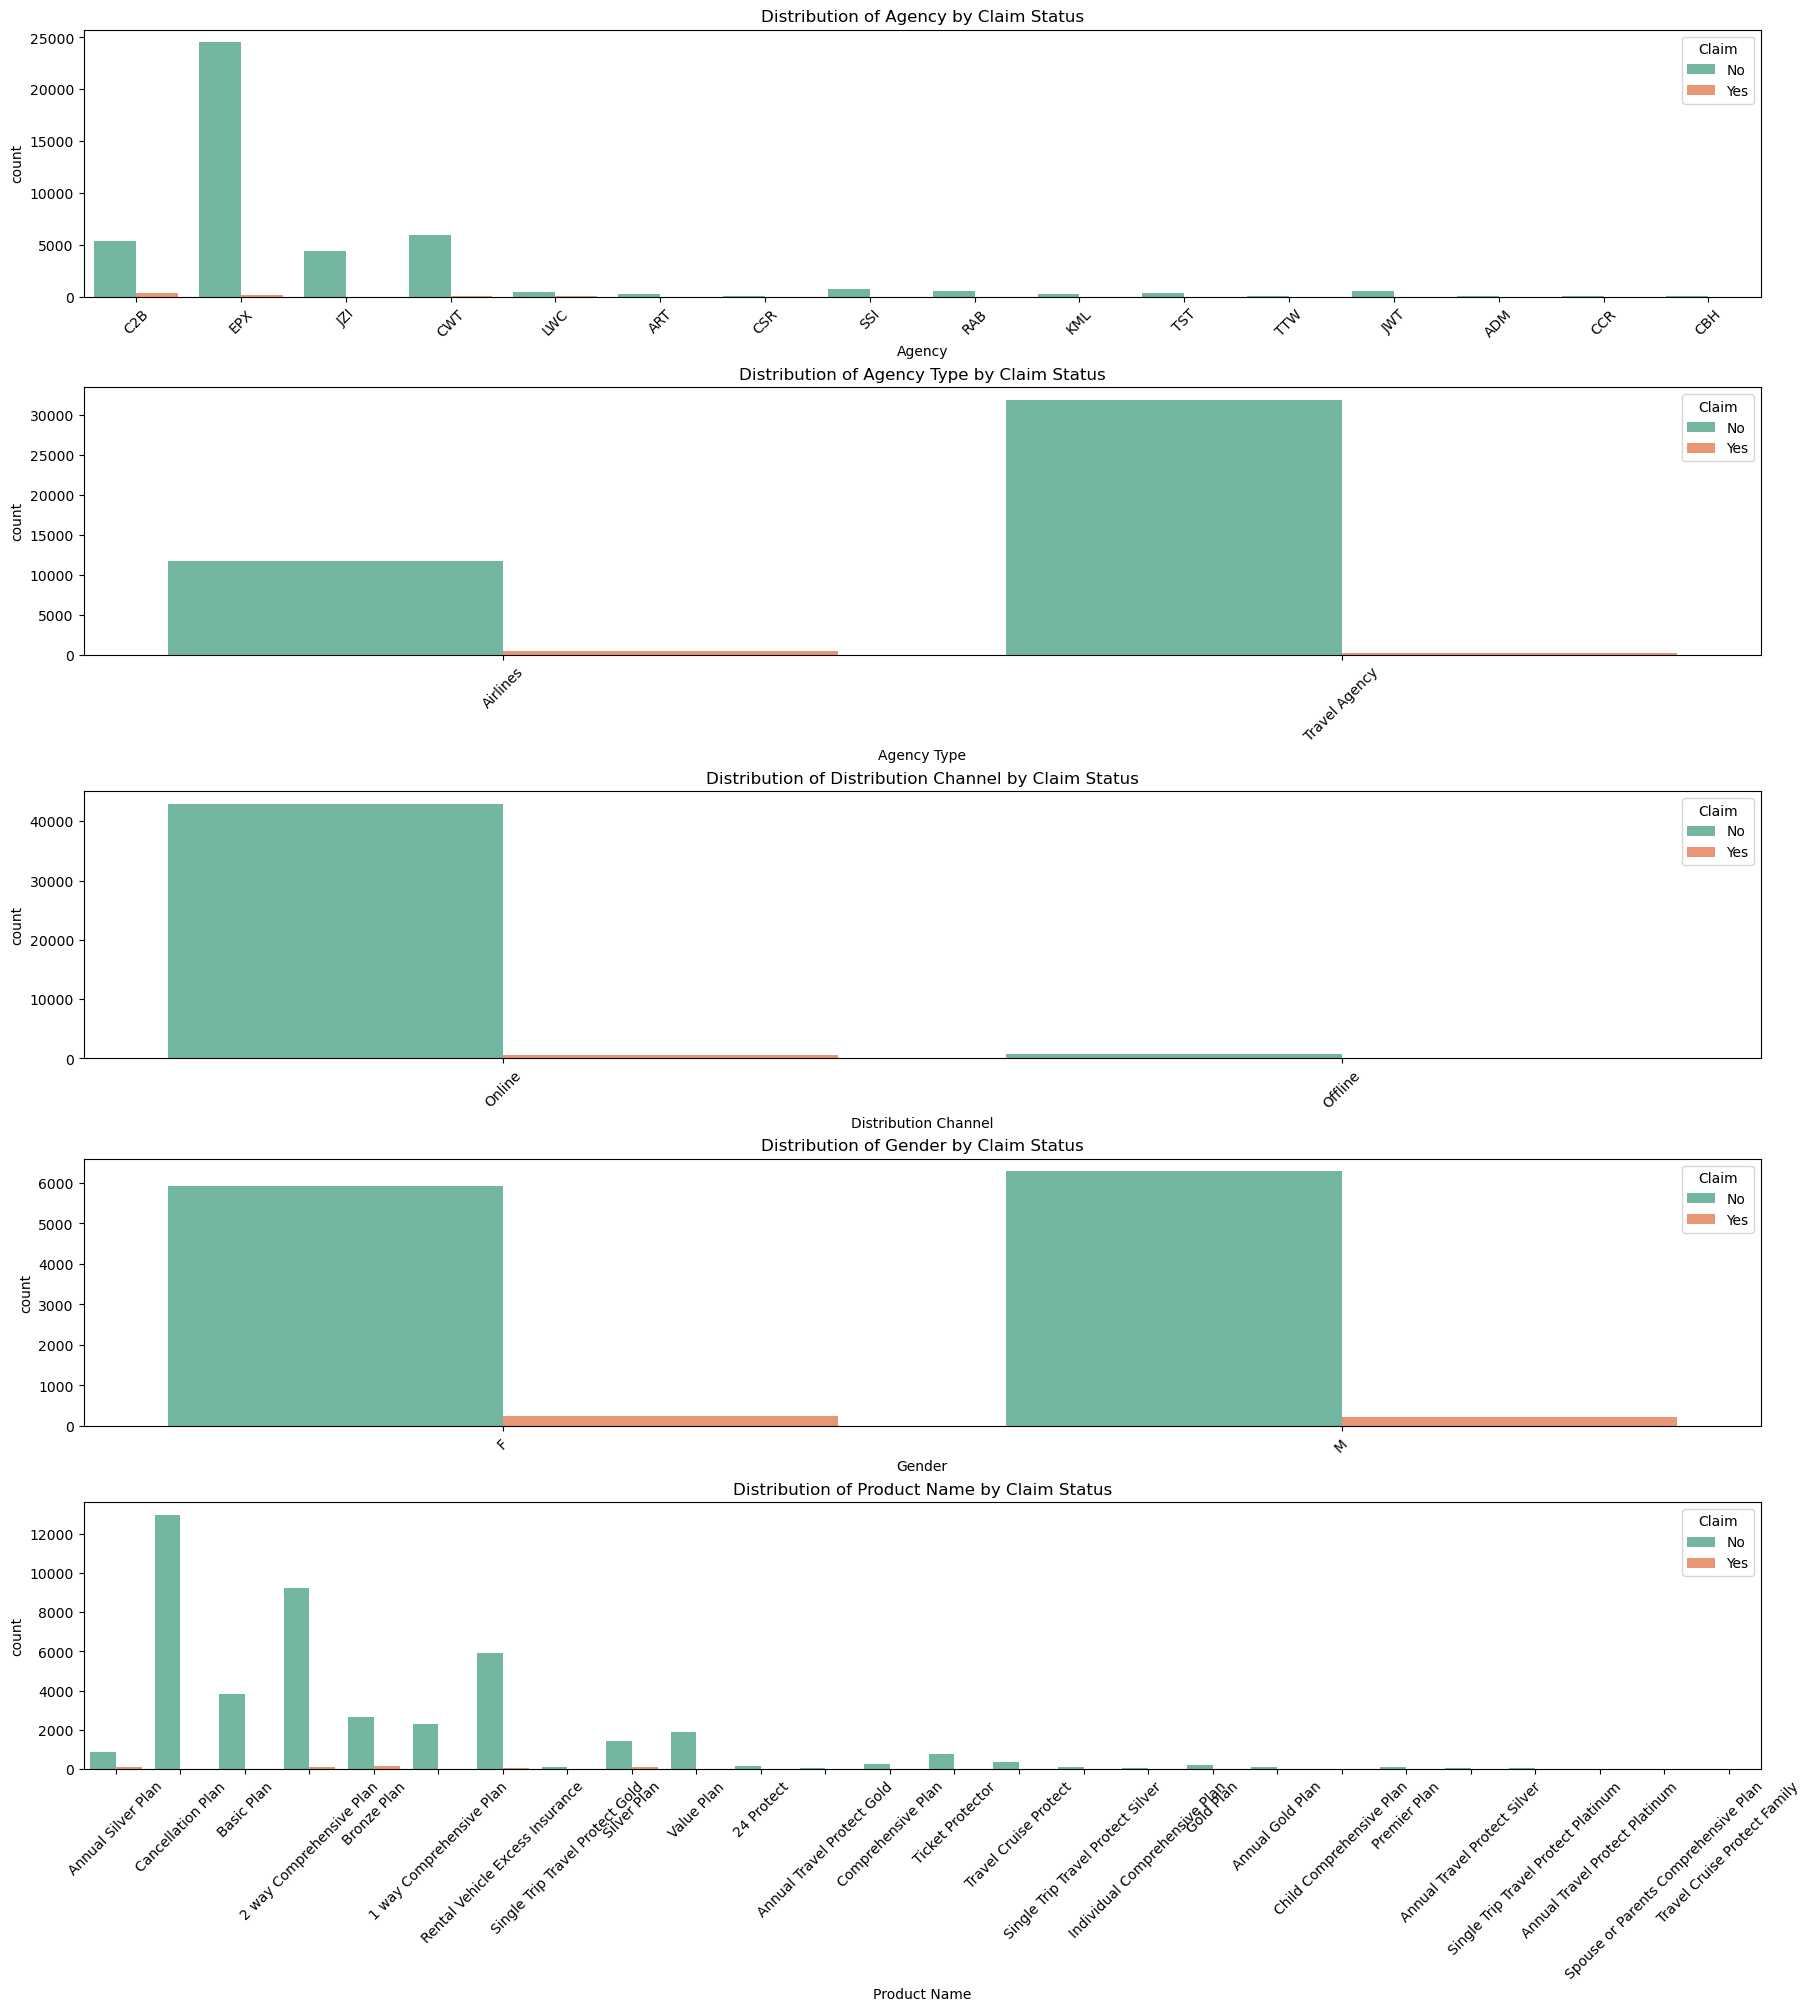

In [69]:
n_rows = 5

fig, axes = plt.subplots(n_rows, 1, figsize=(18, n_rows * 4), constrained_layout=True)
axes = axes.flatten()  # Ubah menjadi 1D array agar mudah diakses

# Visualisasi distribusi tiap fitur kategorikal
for i, col in enumerate(df_categorical):
    sns.countplot(data=df, x=col, hue='Claim', palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Claim Status')
    axes[i].tick_params(axis='x', rotation=45)
    
plt.show()


**5.5 Check Imbalance Data**

Jumlah klaim (Yes/No):
 Claim
No     43651
Yes      677
Name: count, dtype: int64

Persentase klaim:
 Claim
No     98.47
Yes     1.53
Name: proportion, dtype: float64


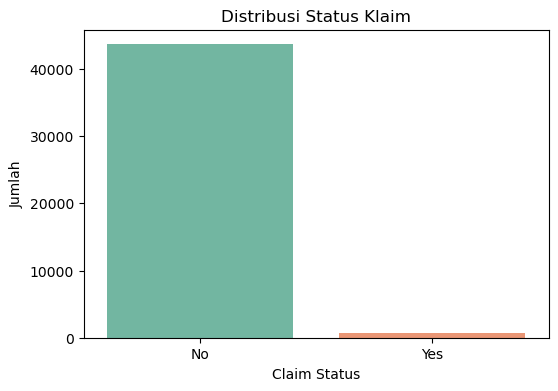

In [82]:
# Hitung jumlah tiap kelas
claim_counts = df['Claim'].value_counts()
claim_percent = df['Claim'].value_counts(normalize=True) * 100

# Tampilkan hasil
print("Jumlah klaim (Yes/No):\n", claim_counts)
print("\nPersentase klaim:\n", claim_percent.round(2))

# Visualisasi bar chart
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Claim', palette='Set2')
plt.title("Distribusi Status Klaim")
plt.xlabel("Claim Status")
plt.ylabel("Jumlah")
plt.show()


**Insight**:

Data Sangat Tidak Seimbang (Imbalanced):

Mayoritas data adalah klaim 'No'.

Hanya sekitar 1,5% dari data yang merupakan klaim 'Yes'.

Merupakan kasus klasifikasi tidak seimbang (imbalanced classification problem).

#### **6. Data Preprocessing**

**6.1 Missing Value**

In [87]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Gender                  71.392799
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Age                      0.000000
Claim                    0.000000
dtype: float64

<Axes: >

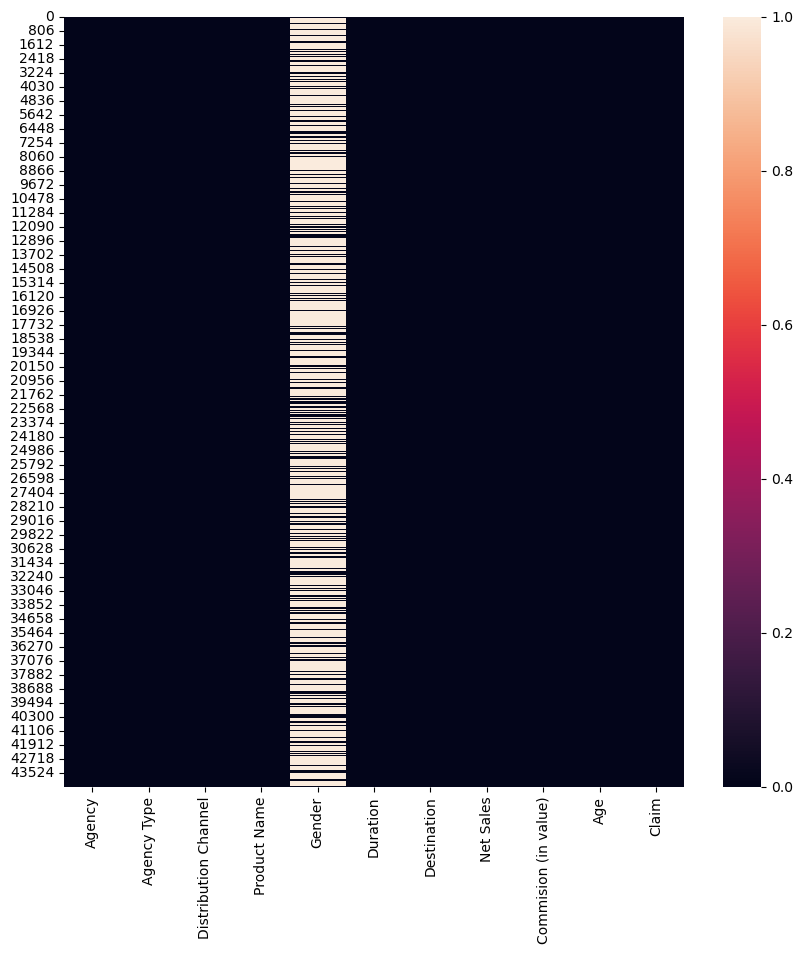

In [89]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['Agency','Agency Type','Distribution Channel','Product Name','Gender','Duration','Destination','Net Sales','Commision (in value)','Age','Claim']].isna())

**Insight**:

Secara garis besar, missing value pada kolom `Gender` memiliki proporsi sebesar 71.3%. Cara penanganan untuk kolom 'Gender' ialah dengan menghapus kolom ini. Karena tidak ada data yang mendukung untuk mengisi data dan jumlahnya terlalu bannyak.

In [92]:
df.drop("Gender", axis = 1,inplace=True)
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,No


**6.2 Data Duplicates**

In [95]:
df.duplicated().sum()
print('Jumlah baris data yang duplikat:', df.duplicated().sum())

Jumlah baris data yang duplikat: 5004


In [97]:
# hapus data yang duplikat.
df.drop_duplicates(keep='first', inplace=True)
df = df.reset_index().drop(columns = {'index'})

# Re-check number of rows & columns
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 39324
Number of columns: 10


Data duplikast dihapus karena:

1. Meningkatkan Kinerja Model Machine Learning
Model belajar dari pola. Jika data duplikat terlalu banyak, model bisa ter-overfit terhadap pola yang berulang, dan kehilangan kemampuan generalisasi terhadap data baru.

2. Efisiensi Memori dan Komputasi
Menyimpan data duplikat memperbesar ukuran dataset secara tidak perlu. Ini akan memperlambat proses komputasi, baik saat preprocessing, training, maupun evaluasi model.

3. Duplikat Biasanya Tidak Memberikan Informasi Tambahan
Jika baris benar-benar identik (semua kolom sama), maka informasi yang dikandungnya sudah tercakup di baris pertama — baris selanjutnya hanya mengulang informasi yang sama.

**6.3 Handling Error per Column**

In [101]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age',
       'Claim'],
      dtype='object')

**Agency**

In [104]:
df['Agency'].value_counts()
#Tidak ditemukan error pada column ini

Agency
EPX    20990
CWT     5726
C2B     5334
JZI     4233
SSI      711
LWC      452
RAB      440
TST      329
JWT      284
KML      229
ART      226
CCR      114
CSR       68
CBH       67
TTW       66
ADM       55
Name: count, dtype: int64

**Agency Type**

In [107]:
df['Agency Type'].value_counts()
#Tidak ditemukan error pada column ini

Agency Type
Travel Agency    28096
Airlines         11228
Name: count, dtype: int64

**Distribution Channel**

In [110]:
df['Distribution Channel'].value_counts()
#Tidak ditemukan error pada column ini

Distribution Channel
Online     38613
Offline      711
Name: count, dtype: int64

**Product Name**

In [113]:
df['Product Name'].value_counts()
#Tidak ditemukan error pada column ini

Product Name
Cancellation Plan                       11009
2 way Comprehensive Plan                 8133
Rental Vehicle Excess Insurance          5726
Basic Plan                               3638
Bronze Plan                              2634
1 way Comprehensive Plan                 1848
Value Plan                               1549
Silver Plan                              1480
Annual Silver Plan                        849
Ticket Protector                          711
Travel Cruise Protect                     328
Comprehensive Plan                        239
Gold Plan                                 235
24 Protect                                171
Annual Gold Plan                          136
Single Trip Travel Protect Gold           134
Premier Plan                              119
Single Trip Travel Protect Silver         116
Annual Travel Protect Gold                 62
Annual Travel Protect Silver               59
Single Trip Travel Protect Platinum        47
Individual Comprehens

**Destination**

In [116]:
df['Destination'].value_counts()
#Tidak ditemukan error pada column ini

Destination
SINGAPORE                                     8106
THAILAND                                      3659
MALAYSIA                                      3173
CHINA                                         2931
AUSTRALIA                                     2453
INDONESIA                                     2029
UNITED STATES                                 1723
HONG KONG                                     1570
PHILIPPINES                                   1461
JAPAN                                         1395
INDIA                                         1228
KOREA, REPUBLIC OF                            1003
VIET NAM                                       997
UNITED KINGDOM                                 881
TAIWAN, PROVINCE OF CHINA                      734
MYANMAR                                        489
BRUNEI DARUSSALAM                              476
CANADA                                         367
NEW ZEALAND                                    361
FRANCE             

**Duration**

In [119]:
# Cek nilai negatif
df[df['Duration']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
24015,JZI,Airlines,Online,Basic Plan,-1,MALAYSIA,18.0,6.3,118,No
24245,JZI,Airlines,Online,Basic Plan,-1,BRUNEI DARUSSALAM,18.0,6.3,118,No


Terdapat data yang memiliki durasi bernilai negatif. Hal ini bisa terjadi karena ada kesalahan input data. Maka kolom durasi akan diubah jadi positif (absolut).

In [122]:
df['Duration'] = df['Duration'].abs()
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...
39319,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,Yes
39320,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,No
39321,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,No
39322,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,No


Kemudian durasi maksimum yang wajar untuk asuransi perjalanan umumnya berkisar antara 30 hingga 547 hari (18 bulan), tergantung jenis polis. Berdasarkan referensi dari GoCompare dan Staysure (UK), polis standar biasanya mencakup hingga 30–90 hari, sementara polis jangka panjang bisa mencapai 12–18 bulan. Oleh karena itu, durasi diatas 547 hari akan dihapus.

In [125]:
# cek durasi lebih dari 547 hari
df[df['Duration']>547]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
87,SSI,Airlines,Online,Ticket Protector,4736,SINGAPORE,0.32,0.09,48,No
4556,SSI,Airlines,Online,Ticket Protector,4857,SINGAPORE,0.32,0.09,48,No
9712,SSI,Airlines,Online,Ticket Protector,4815,SINGAPORE,0.32,0.09,48,No
11510,SSI,Airlines,Online,Ticket Protector,4652,SINGAPORE,0.32,0.09,48,No
18160,SSI,Airlines,Online,Ticket Protector,4881,SINGAPORE,0.13,0.04,48,No
18645,SSI,Airlines,Online,Ticket Protector,4844,SINGAPORE,0.32,0.09,48,No
19983,C2B,Airlines,Online,Annual Silver Plan,740,SINGAPORE,0.00,54.19,36,No
20550,SSI,Airlines,Online,Ticket Protector,4580,SINGAPORE,0.32,0.09,48,No
23479,SSI,Airlines,Online,Ticket Protector,4685,SINGAPORE,0.32,0.09,48,No
25589,SSI,Airlines,Online,Ticket Protector,4829,SINGAPORE,0.32,0.09,48,No


In [127]:
# filter durasi yang lebih dari 547 hari
df = df[(df['Duration']<548)]
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...
39319,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,Yes
39320,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,No
39321,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,No
39322,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,No


**Age**

Untuk usia, usia diatas 100 tahun dianggap berada pada cakupan yang tidak normal.

In [131]:
# filter usia yang lebih dari 100 tahun
df = df[(df['Age']<101)]
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...
39319,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,Yes
39320,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,No
39321,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,No
39322,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,No


**Claim**

In [134]:
df['Claim']= np.where(df['Claim']=='Yes', 1, 0)
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...
39319,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,1
39320,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,0
39321,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,0
39322,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,0


**6.4 Normality Test for Numerical**

In [137]:
# Apply normaltest to each column and collect the p-values
normality_results = df.select_dtypes(include='number').apply(lambda col: normaltest(col.dropna())[1]).reset_index()
normality_results.columns = ['Column', 'p-value']
display(normality_results)
print(normality_results[normality_results['p-value']<=0.05]['Column'].unique())

,Column,p-value
0,Duration,0.0
1,Net Sales,0.0
2,Commision (in value),0.0
3,Age,0.0
4,Claim,0.0


['Duration' 'Net Sales' 'Commision (in value)' 'Age' 'Claim']


**6.5 Multicolinear**

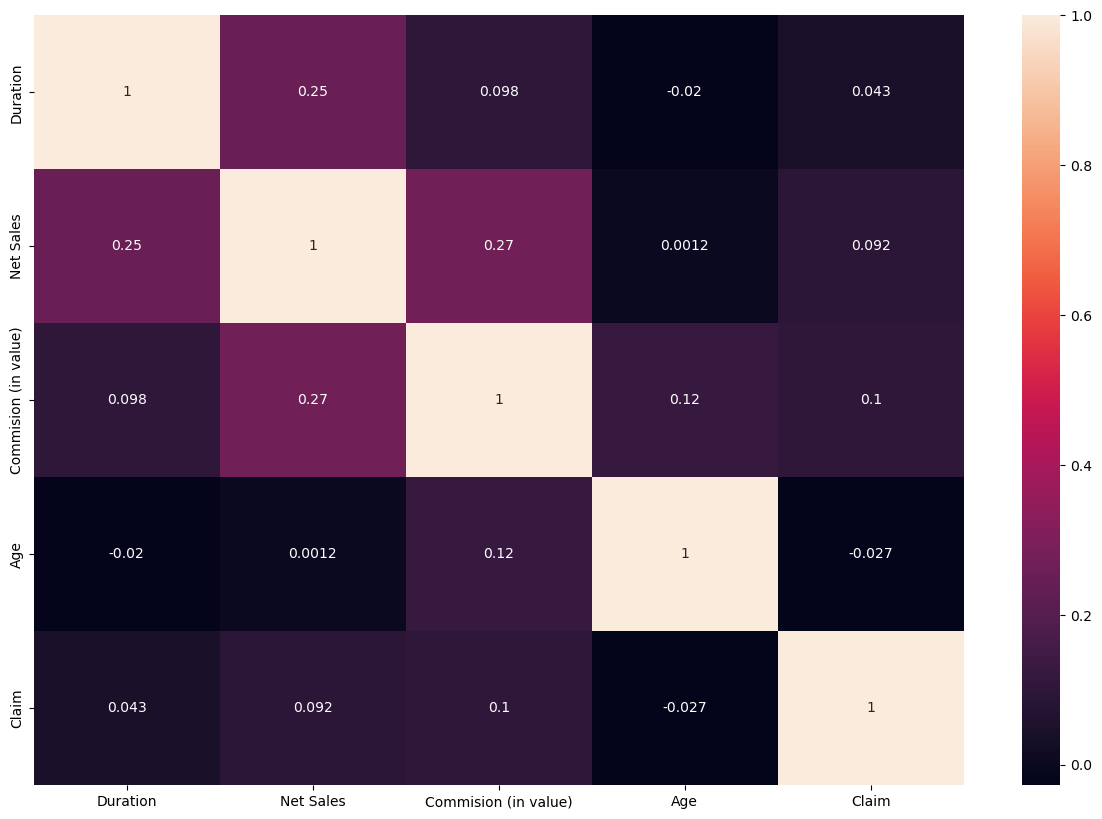

[['Duration', 'Duration'], ['Net Sales', 'Net Sales'], ['Commision (in value)', 'Commision (in value)'], ['Age', 'Age'], ['Claim', 'Claim']]


In [140]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include='number').corr(method='spearman'),annot=True)
plt.show()

dfcorr=df.select_dtypes(include='number')
corrMatrix=dfcorr.corr(method='spearman')
already_in = set()
result = []
for col in corrMatrix:
    large_corr = corrMatrix[col][corrMatrix[col] >= 0.6 ].index.tolist()
    if large_corr and col not in already_in:
        already_in.update(set(large_corr))
        large_corr.append(col)
        result.append(large_corr)

print(result)

**6.5 Feature Engineering**

In [341]:
# Define Target & Feature
X = df.drop(columns = 'Claim')
y = df['Claim']

# Feature Selection
onehot_features = ["Agency Type","Distribution Channel","Agency", "Product Name", "Destination"]
numeric_features = ["Duration","Net Sales","Commision (in value)","Age"]

# Feature Engineering
selected_features = onehot_features+numeric_features
df[selected_features].head()

,Agency Type,Distribution Channel,Agency,Product Name,Destination,Duration,Net Sales,Commision (in value),Age,Agency,Product Name,Destination
0,Airlines,Online,C2B,Annual Silver Plan,SINGAPORE,365,216.0,54.0,57,C2B,Annual Silver Plan,SINGAPORE
1,Travel Agency,Online,EPX,Cancellation Plan,MALAYSIA,4,10.0,0.0,33,EPX,Cancellation Plan,MALAYSIA
2,Airlines,Online,JZI,Basic Plan,INDIA,19,22.0,7.7,26,JZI,Basic Plan,INDIA
3,Travel Agency,Online,EPX,2 way Comprehensive Plan,UNITED STATES,20,112.0,0.0,59,EPX,2 way Comprehensive Plan,UNITED STATES
4,Airlines,Online,C2B,Bronze Plan,SINGAPORE,8,16.0,4.0,28,C2B,Bronze Plan,SINGAPORE


In [349]:
# Pipeline untuk fitur kategori
onehot_pipeline = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Pipeline untuk fitur numerik
numeric_pipeline = Pipeline([
    ("scaler", RobustScaler())
])

# Gabungkan semua dalam satu preprocessor
preprocessor = ColumnTransformer([
    ("cat", onehot_pipeline, onehot_features),
    ("num", numeric_pipeline, numeric_features)
])

# Gabungkan semua pipeline ke dalam satu preprocessor berdasarkan tipe fitur
preprocessor = ColumnTransformer(
    [
        ("cat", onehot_pipeline, onehot_features),
        ("num", numeric_pipeline, numeric_features)
    ]
)

# Transformasi fitur dengan preprocessor
X_preprocessed = preprocessor.fit_transform(X)
X_preprocessed = pd.DataFrame(
    X_preprocessed,
    columns=preprocessor.get_feature_names_out(),
    index=X.index)
X_preprocessed

,cat__Agency Type_Airlines,cat__Agency Type_Travel Agency,cat__Distribution Channel_Offline,cat__Distribution Channel_Online,cat__Agency_ADM,cat__Agency_ART,cat__Agency_C2B,cat__Agency_CBH,cat__Agency_CCR,cat__Agency_CSR,cat__Agency_CWT,cat__Agency_EPX,cat__Agency_JZI,cat__Agency_KML,cat__Agency_LWC,cat__Agency_RAB,cat__Agency_SSI,cat__Agency_TST,cat__Agency_TTW,cat__Product Name_1 way Comprehensive Plan,cat__Product Name_2 way Comprehensive Plan,cat__Product Name_24 Protect,cat__Product Name_Annual Gold Plan,cat__Product Name_Annual Silver Plan,cat__Product Name_Annual Travel Protect Gold,cat__Product Name_Annual Travel Protect Platinum,cat__Product Name_Annual Travel Protect Silver,cat__Product Name_Basic Plan,cat__Product Name_Bronze Plan,cat__Product Name_Cancellation Plan,cat__Product Name_Child Comprehensive Plan,cat__Product Name_Comprehensive Plan,cat__Product Name_Gold Plan,cat__Product Name_Individual Comprehensive Plan,cat__Product Name_Premier Plan,cat__Product Name_Rental Vehicle Excess Insurance,cat__Product Name_Silver Plan,cat__Product Name_Single Trip Travel Protect Gold,cat__Product Name_Single Trip Travel Protect Platinum,cat__Product Name_Single Trip Travel Protect Silver,cat__Product Name_Spouse or Parents Comprehensive Plan,cat__Product Name_Ticket Protector,cat__Product Name_Travel Cruise Protect,cat__Product Name_Travel Cruise Protect Family,cat__Product Name_Value Plan,cat__Destination_ANGOLA,cat__Destination_ARGENTINA,cat__Destination_ARMENIA,cat__Destination_AUSTRALIA,cat__Destination_AUSTRIA,cat__Destination_AZERBAIJAN,cat__Destination_BAHRAIN,cat__Destination_BANGLADESH,cat__Destination_BELARUS,cat__Destination_BELGIUM,cat__Destination_BENIN,cat__Destination_BERMUDA,cat__Destination_BHUTAN,cat__Destination_BOLIVIA,cat__Destination_BOTSWANA,cat__Destination_BRAZIL,cat__Destination_BRUNEI DARUSSALAM,cat__Destination_BULGARIA,cat__Destination_CAMBODIA,cat__Destination_CAMEROON,cat__Destination_CANADA,cat__Destination_CAYMAN ISLANDS,cat__Destination_CHILE,cat__Destination_CHINA,cat__Destination_COLOMBIA,cat__Destination_COSTA RICA,cat__Destination_CROATIA,cat__Destination_CYPRUS,cat__Destination_CZECH REPUBLIC,cat__Destination_DENMARK,cat__Destination_DOMINICAN REPUBLIC,cat__Destination_ECUADOR,cat__Destination_EGYPT,cat__Destination_ESTONIA,cat__Destination_ETHIOPIA,cat__Destination_FAROE ISLANDS,cat__Destination_FIJI,cat__Destination_FINLAND,cat__Destination_FRANCE,cat__Destination_FRENCH POLYNESIA,cat__Destination_GEORGIA,cat__Destination_GERMANY,cat__Destination_GHANA,cat__Destination_GREECE,cat__Destination_GUADELOUPE,cat__Destination_GUAM,cat__Destination_GUINEA,cat__Destination_GUINEA-BISSAU,cat__Destination_GUYANA,cat__Destination_HONG KONG,cat__Destination_HUNGARY,cat__Destination_ICELAND,cat__Destination_INDIA,cat__Destination_INDONESIA,"cat__Destination_IRAN, ISLAMIC REPUBLIC OF",cat__Destination_IRELAND,cat__Destination_ISRAEL,cat__Destination_ITALY,cat__Destination_JAMAICA,cat__Destination_JAPAN,cat__Destination_JORDAN,cat__Destination_KAZAKHSTAN,cat__Destination_KENYA,"cat__Destination_KOREA, REPUBLIC OF",cat__Destination_KUWAIT,cat__Destination_KYRGYZSTAN,cat__Destination_LAO PEOPLE'S DEMOCRATIC REPUBLIC,cat__Destination_LATVIA,cat__Destination_LEBANON,cat__Destination_LITHUANIA,cat__Destination_LUXEMBOURG,cat__Destination_MACAO,"cat__Destination_MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF",cat__Destination_MALAYSIA,cat__Destination_MALDIVES,cat__Destination_MALI,cat__Destination_MALTA,cat__Destination_MAURITIUS,cat__Destination_MEXICO,"cat__Destination_MOLDOVA, REPUBLIC OF",cat__Destination_MONGOLIA,cat__Destination_MOROCCO,cat__Destination_MYANMAR,cat__Destination_NAMIBIA,cat__Destination_NEPAL,cat__Destination_NETHERLANDS,cat__Destination_NEW ZEALAND,cat__Destination_NIGERIA,cat__Destination_NORTHERN MARIANA ISLANDS,cat__Destination_NORWAY,cat__Destination_OMAN,cat__Destination_PAKISTAN,cat__Destination_PANAMA,cat__Destination_PAPUA NEW GUINEA,cat__Destination_PERU,cat__Destination_PHI

#### **7. Modeling and Evaluation**

In [352]:
logreg = LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=777)
rf = RandomForestClassifier(random_state=777)
ada = AdaBoostClassifier(random_state=777)
xgb = XGBClassifier(random_state=777)
lgbm = lgb.LGBMClassifier(random_state=777)
gbm = GradientBoostingClassifier(random_state=777)

In [357]:
# Split data terlebih dahulu (train = 80%, test = 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=777)

# Skor khusus
precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

# Strategi resampling
sampling_strategies = {
    "No Resampling": None,
    "SMOTE": SMOTE(random_state=777),
    "RandomOverSampler": RandomOverSampler(random_state=777),
    "RandomUnderSampler": RandomUnderSampler(random_state=777),
}

# Model
models = [logreg, knn, tree, rf, ada, xgb, lgbm, gbm]
model_names = [
    "Logistic Regression",
    "KNN",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "XGBoost",
    "LightGBM",
    "Gradient Boosting",
]

# Validasi silang di train set
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=777)

# Semua hasil dikumpulkan di sini
all_results = []

for strategy_name, sampler in sampling_strategies.items():
    print(f"Evaluating with: {strategy_name}")

    mean_roc_auc, std_roc_auc = [], []
    mean_precision, std_precision = [], []
    mean_recall, std_recall = [], []

    for i in range(len(models)):
        steps = [("preprocessor", preprocessor)]
        if sampler is not None:
            steps.append(("sampler", sampler))
        steps.append(("classifier", models[i]))

        pipe = ImbPipeline(steps)

        scores = cross_validate(
            pipe,
            X_train,  # evaluasi hanya pada data latih
            y_train,
            cv=skfold,
            scoring={
                "roc_auc": "roc_auc",
                "precision": precision_scorer,
                "recall": recall_scorer,
            },
            return_train_score=False,
            error_score='raise'
        )

        mean_roc_auc.append(scores["test_roc_auc"].mean())
        std_roc_auc.append(scores["test_roc_auc"].std())
        mean_precision.append(scores["test_precision"].mean())
        std_precision.append(scores["test_precision"].std())
        mean_recall.append(scores["test_recall"].mean())
        std_recall.append(scores["test_recall"].std())

    # Simpan hasil dalam dataframe
    results = pd.DataFrame({
        "Sampling Strategy": strategy_name,
        "Model": model_names,
        "Mean ROC AUC": mean_roc_auc,
        "Std ROC AUC": std_roc_auc,
        "Mean Precision": mean_precision,
        "Std Precision": std_precision,
        "Mean Recall": mean_recall,
        "Std Recall": std_recall,
    })

    all_results.append(results)

# Gabungkan semua hasil jadi satu tabel besar
train_results = pd.concat(all_results, ignore_index=True)

# Urutkan (misalnya berdasarkan F2 Score)
train_results = train_results.sort_values(by=["Mean Recall"], ascending=[False])

# Tampilkan hasil
train_results

Evaluating with: No Resampling
[LightGBM] [Info] Number of positive: 427, number of negative: 24460
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 24887, number of used features: 96
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.017158 -> initscore=-4.048010
[LightGBM] [Info] Start training from score -4.048010
[LightGBM] [Info] Number of positive: 426, number of negative: 24461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1010
[LightGBM] [Info] Number of data points in the train set: 24887, number of used feat

,Sampling Strategy,Model,Mean ROC AUC,Std ROC AUC,Mean Precision,Std Precision,Mean Recall,Std Recall
25,RandomUnderSampler,KNN,0.763399,0.020919,0.042732,0.001843,0.733645,0.037417
8,SMOTE,Logistic Regression,0.801354,0.021229,0.053795,0.001912,0.722465,0.033803
16,RandomOverSampler,Logistic Regression,0.803924,0.021488,0.055861,0.002201,0.716787,0.025187
24,RandomUnderSampler,Logistic Regression,0.803365,0.019596,0.054110,0.002567,0.712961,0.020880
27,RandomUnderSampler,Random Forest,0.774945,0.014316,0.043740,0.000943,0.705378,0.020244
31,RandomUnderSampler,Gradient Boosting,0.799240,0.011016,0.049954,0.002816,0.696015,0.018084
30,RandomUnderSampler,LightGBM,0.761804,0.003484,0.039999,0.001117,0.690478,0.029284
29,RandomUnderSampler,XGBoost,0.756852,0.009144,0.039448,0.001012,0.688468,0.030785
28,RandomUnderSampler,AdaBoost,0.807564,0.018568,0.056021,0.010469,0.684729,0.032406
20,RandomOverSampler,AdaBoost,0.812913,0.017436,0.062413,0.003431,0.671680,0.025744


In [152]:
# Split data terlebih dahulu (train = 80%, test = 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=777)

# Menyimpan hasil evaluasi test set
test_results = []

# Loop setiap strategi sampling
for strategy_name, sampler in sampling_strategies.items():
    print(f"Evaluating TEST SET with: {strategy_name}")
    
    # Loop setiap model
    for model, model_name in zip(models, model_names):
        # Pipeline
        steps = [("preprocessor", preprocessor)]
        if sampler is not None:
            steps.append(("sampler", sampler))
        steps.append(("classifier", model))
        pipe = ImbPipeline(steps)

        # Fit pada TRAIN set
        pipe.fit(X_train, y_train)

        # Prediksi pada TEST set
        y_pred = pipe.predict(X_test)
        y_proba = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe, "predict_proba") else None

        # Hitung metrik evaluasi
        roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)

        # Simpan hasilnya
        test_results.append({
            "Sampling Strategy": strategy_name,
            "Model": model_name,
            "ROC AUC": roc_auc,
            "Precision": precision,
            "Recall": recall
        })

# Gabungkan semua hasil ke dalam dataframe
test_results_df = pd.DataFrame(test_results)

# Urutkan berdasarkan F2 Score dalam setiap metode sampling
test_results_df = test_results_df.sort_values(by=["Recall"], ascending=[False])

# Tampilkan hasil
test_results_df

Evaluating TEST SET with: No Resampling
[LightGBM] [Info] Number of positive: 533, number of negative: 30576
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001695 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1017
[LightGBM] [Info] Number of data points in the train set: 31109, number of used features: 99
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.017133 -> initscore=-4.049449
[LightGBM] [Info] Start training from score -4.049449
Evaluating TEST SET with: SMOTE
[LightGBM] [Info] Number of positive: 30576, number of negative: 30576
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11387
[LightGBM] [Info] Number of data points 

,Sampling Strategy,Model,ROC AUC,Precision,Recall
29,RandomUnderSampler,XGBoost,0.830959,0.046757,0.834586
30,RandomUnderSampler,LightGBM,0.838643,0.046689,0.827068
27,RandomUnderSampler,Random Forest,0.845689,0.050691,0.827068
31,RandomUnderSampler,Gradient Boosting,0.842357,0.049767,0.804511
28,RandomUnderSampler,AdaBoost,0.841661,0.049173,0.804511
24,RandomUnderSampler,Logistic Regression,0.844542,0.059053,0.796992
26,RandomUnderSampler,Decision Tree,0.722698,0.038405,0.789474
25,RandomUnderSampler,KNN,0.828828,0.049598,0.789474
8,SMOTE,Logistic Regression,0.829599,0.058361,0.781955
16,RandomOverSampler,Logistic Regression,0.831274,0.060750,0.766917


**Best Model** 

In [359]:
# 1. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=777
)

# 2. Skor khusus
precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)

# 3. Resampler dan Pipeline
sampler = RandomUnderSampler(random_state=777)
pipe = ImbPipeline([
    ("preprocessor", preprocessor),
    ("sampler", sampler),
    ("classifier", xgb)
])

# 4. Cross-validation di training set
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=777)
cv_scores = cross_validate(
    pipe,
    X_train,
    y_train,
    cv=skfold,
    scoring={
        "roc_auc": "roc_auc",
        "precision": precision_scorer,
        "recall": recall_scorer,
    },
    return_train_score=False,
    error_score='raise'
)

# 5. Hasil evaluasi di training (CV)
train_results = pd.DataFrame({
    "Sampling Strategy": ["RandomUnderSampler"],
    "Model": ["XGBoost"],
    "Mean ROC AUC (Train)": [cv_scores["test_roc_auc"].mean()],
    "Std ROC AUC (Train)": [cv_scores["test_roc_auc"].std()],
    "Mean Precision (Train)": [cv_scores["test_precision"].mean()],
    "Std Precision (Train)": [cv_scores["test_precision"].std()],
    "Mean Recall (Train)": [cv_scores["test_recall"].mean()],
    "Std Recall (Train)": [cv_scores["test_recall"].std()],
})

# 6. Fit pipeline dan evaluasi di test set
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

# 7. Hasil evaluasi di test set
test_results = pd.DataFrame({
    "Sampling Strategy": ["RandomUnderSampler"],
    "Model": ["XGBoost"],
    "ROC AUC (Test)": [roc_auc_score(y_test, y_proba)],
    "Precision (Test)": [precision_score(y_test, y_pred)],
    "Recall (Test)": [recall_score(y_test, y_pred)],
})

# 8. Gabungkan dan tampilkan hasil
final_results = pd.concat([train_results, test_results.drop(columns=["Sampling Strategy", "Model"])], axis=1)
print(final_results)

    Sampling Strategy    Model  Mean ROC AUC (Train)  Std ROC AUC (Train)  \
0  RandomUnderSampler  XGBoost              0.756852             0.009144   

   Mean Precision (Train)  Std Precision (Train)  Mean Recall (Train)  \
0                0.039448               0.001012             0.688468   

   Std Recall (Train)  ROC AUC (Test)  Precision (Test)  Recall (Test)  
0            0.030785        0.830959          0.046757       0.834586  


**Insight**:
1. Recall Tinggi (Test Set: 83,46%)
Makna: Model mampu menangkap 83% dari pemegang polis yang benar-benar akan mengajukan klaim.

Ini sangat penting dalam bisnis asuransi perjalanan karena perusahaan bisa mengantisipasi klaim yang benar-benar terjadi, mengurangi keterlambatan pelayanan klaim, membantu perencanaan alokasi dana cadangan secara lebih akurat, memungkinkan tim operasional mempersiapkan case handling untuk pemegang polis dengan risiko klaim tinggi.

2. Precision Sangat Rendah (Test Set: 4,7%)
Makna: Dari seluruh prediksi model yang mengatakan “akan klaim”, hanya 4,7% yang benar-benar mengajukan klaim.

Konsekuensi bisnisnya akan banyak false positive, artinya: perusahaan mungkin terlalu waspada pada orang yang sebenarnya tidak akan mengajukan klaim. Hal ini bisa menimbulkan pemborosan operasional jika dilakukan tindakan preventif yang tidak perlu. Tapi konsekuensinya tidak separah jika recall rendah.

🔹 3. ROC AUC Tinggi (0.83 di Test)
Makna: Secara keseluruhan, model memiliki kemampuan pemisahan (discriminative ability) yang baik antara pemegang polis yang akan klaim vs tidak klaim.

Model bisa digunakan sebagai bagian dari sistem pendukung keputusan yaitu memberi skor risiko klaim untuk setiap calon pemegang polis atau perjalanan.

## **Hyperparameter Tuning XGBoost dengan GridSearchCV**

In [193]:
# 1. Buat pipeline (preprocessing + sampler + model)
pipe = ImbPipeline([
    ("preprocessor", preprocessor),
    ("sampler", RandomUnderSampler(random_state=777)),
    ("classifier", xgb.XGBClassifier(random_state=777, use_label_encoder=False, eval_metric="logloss"))
])

# 2. Tentukan parameter grid
param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [3, 5, 7],
    "classifier__learning_rate": [0.01, 0.1, 0.3],
    "classifier__subsample": [0.8, 1.0],
    "classifier__colsample_bytree": [0.8, 1.0],
}

# 3. Buat GridSearchCV
grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=777),
    scoring="recall",  # Fokus bisnis recall
    n_jobs=-1,
    verbose=2,
)

# 4. Jalankan Grid Search
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=777, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Agency',
                                                                          'Agency '
                                                                          'Type',
                                                                          'Distribution '
                                                                          'Channel',
                                                                          'Product '
                                                                          'Name',
                                                                          'Destination']),
                                                                        ('num',
                                                                         Pipeline(steps=[('s...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.8, 1.0],
                         'classifier__learning_rate': [0.01, 0.1, 0.3],
                         'classifier__max_depth': [3, 5, 7],
                         'classifier__n_estimators': [100, 200],
                         'classifier__subsample': [0.8, 1.0]},
             scoring='recall', verbose=2)

In [195]:
# Ambil model terbaik dari hasil grid search
best_model = grid_search.best_estimator_

# Prediksi untuk train dan test
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Hitung recall
train_recall = recall_score(y_train, y_pred_train, zero_division=0)
test_recall = recall_score(y_test, y_pred_test, zero_division=0)

# Tampilkan hasil recall
print(f"Recall (Train): {train_recall:.4f}")
print(f"Recall (Test) : {test_recall:.4f}")

Recall (Train): 0.8255
Recall (Test) : 0.8120


**Insight:**

Perbedaan antara Recall di data latih dan data uji sangat kecil (0.8255 vs 0.8120), artinya:

Model tidak overfitting (tidak hanya bagus di data latih). Sehingga model ini cukup stabil dan bisa diandalkan untuk prediksi.

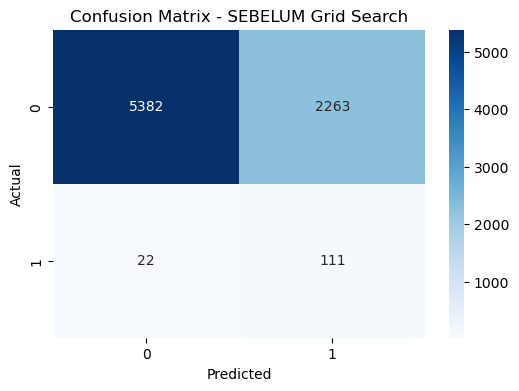

🔹 Classification Report - SEBELUM Grid Search
              precision    recall  f1-score   support

           0       1.00      0.70      0.82      7645
           1       0.05      0.83      0.09       133

    accuracy                           0.71      7778
   macro avg       0.52      0.77      0.46      7778
weighted avg       0.98      0.71      0.81      7778



In [227]:
# Fit pipeline awal (sebelum tuning)
pipe.fit(X_train, y_train)
y_pred_before = pipe.predict(X_test)

# Confusion matrix
cm_before = confusion_matrix(y_test, y_pred_before)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SEBELUM Grid Search")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Report klasifikasi
print("🔹 Classification Report - SEBELUM Grid Search")
print(classification_report(y_test, y_pred_before))

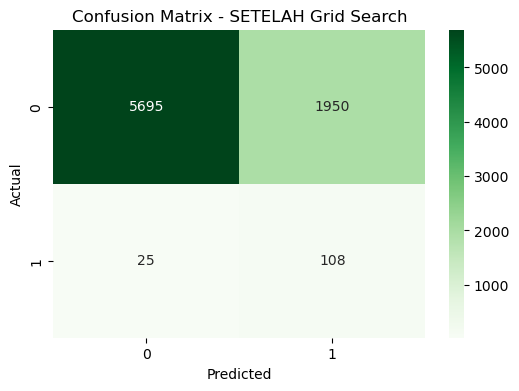

🔹 Classification Report - SETELAH Grid Search
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      7645
           1       0.05      0.81      0.10       133

    accuracy                           0.75      7778
   macro avg       0.52      0.78      0.48      7778
weighted avg       0.98      0.75      0.84      7778



In [229]:
# Prediksi menggunakan model terbaik setelah tuning
y_pred_after = best_model.predict(X_test)

# Confusion matrix
cm_after = confusion_matrix(y_test, y_pred_after)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_after, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - SETELAH Grid Search")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Report klasifikasi
print("🔹 Classification Report - SETELAH Grid Search")
print(classification_report(y_test, y_pred_after))

**Sebelum Tuning:**

Banyak false positive: 2263 kasus dari kelas 0 diprediksi sebagai klaim (kelas 1).

True positive (klaim yang benar): 111

False negative (klaim yang luput): 22

**Setelah Tuning:**

False positive menurun menjadi 1950 (lebih baik).

True positive sedikit turun ke 108.

False negative naik sedikit ke 25.

**Insight**:
1. Recall tetap tinggi (>80%), yang sangat penting karena tidak ingin klaim valid terlewat.
2. Precision  masih rendah (0.05), artinya banyak prediksi klaim yang sebenarnya bukan klaim, model terlalu banyak menganggap kasus sebagai klaim.
3. Model menjadi lebih konservatif dalam menyatakan bahwa suatu kasus adalah klaim.
4. F1-score dan akurasi keseluruhan menunjukkan bahwa model setelah tuning lebih seimbang.

## **Tuning Treshold**

Secara default, model klasifikasi menggunakan threshold 0.5:

Jika predict_proba >= 0.5, maka prediksi = 1 (klaim).
Jika < 0.5, maka prediksi = 0 (tidak klaim).

Namun threshold ini belum tentu optimal, terutama saat:

✅ Data imbalanced (contoh: hanya 10–20% yang klaim)

✅ Bisnis lebih memprioritaskan Recall daripada Precision

✅ Ingin menyesuaikan strategi prediksi dengan konteks risiko bisnis


Tujuan Treshold tuning:

1. Meningkatkan Recall (menangkap sebanyak mungkin yang akan klaim)

2. Mengontrol False Negative, yang mahal bagi perusahaan asuransi

3. Mencapai trade-off terbaik antara Recall dan Precision



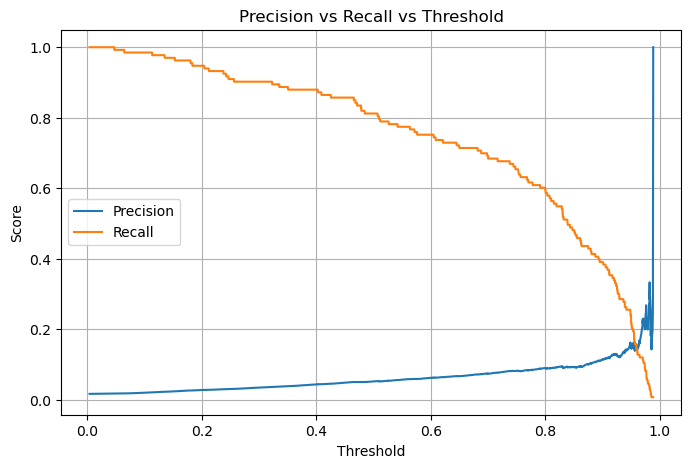

In [255]:
# 1. Dapatkan probabilitas prediksi untuk kelas 1 (klaim)
y_proba = best_model.predict_proba(X_test)[:, 1]

# 2. Hitung precision, recall, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# 3. Plot precision-recall vs threshold
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()

In [266]:
with open("best_xgboost_rus_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

**Insight**: 

Hasil evaluasi (recall vs precision) menunjukkan bahwa tidak ada threshold lain yang memberi trade-off lebih baik dibanding default 0.5. Dalam konteks pada bisnis ini, presisi yang rendah bisa diterima jika recall tinggi, karena: tujuan dari modelnya untuk menekan nilai false negative.

## **Feature Importances**

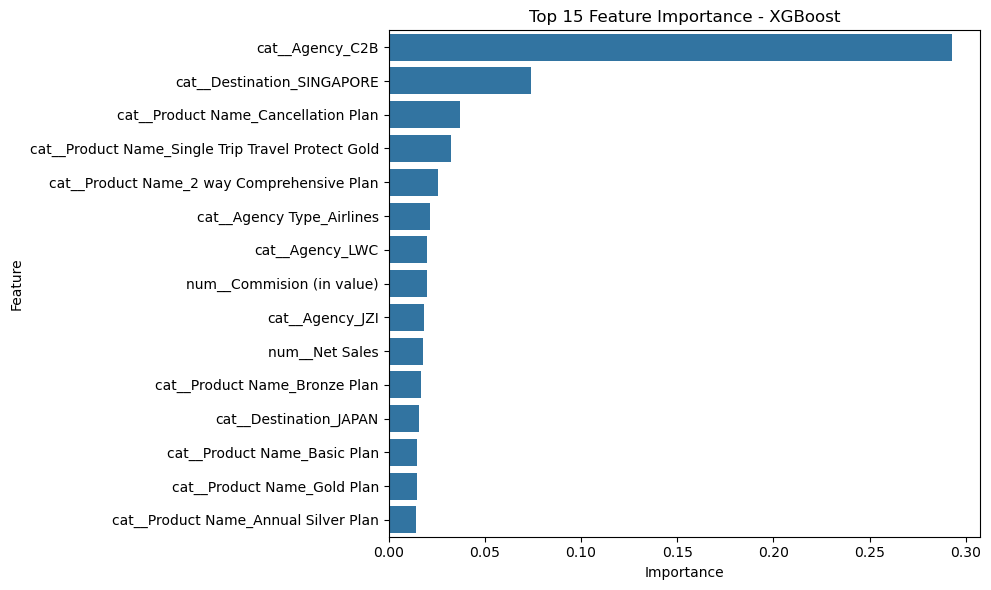

In [278]:
# Ambil model XGBoost dari pipeline
xgb_model = best_model.named_steps["classifier"]

# Ambil nama fitur dari preprocessor
feature_names = preprocessor.get_feature_names_out()

# Buat DataFrame untuk feature importance
importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importances.head(15))
plt.title("Top 15 Feature Importance - XGBoost")
plt.tight_layout()
plt.show()

**Insight:**

Grafik di atas menunjukkan 15 fitur terpenting yang paling memengaruhi prediksi klaim dalam model XGBoost untuk asuransi perjalanan. Fitur Agency_C2B (agen Customer to Business) menempati peringkat tertinggi dengan pengaruh yang sangat dominan, menunjukkan bahwa jenis agen ini memiliki hubungan yang kuat dengan kejadian klaim. Disusul oleh Destination_SINGAPORE, yang menunjukkan bahwa klaim lebih sering terjadi pada perjalanan ke Singapura. Beberapa nama produk seperti Cancellation Plan dan Single Trip Travel Protect Gold juga cukup berpengaruh, yang mengindikasikan bahwa jenis produk tertentu lebih sering diklaim, kemungkinan karena cakupan manfaatnya yang luas. Selain itu, atribut terkait jenis agen (Agency Type_Airlines) dan nilai finansial seperti Commision dan Net Sales juga menunjukkan kontribusi yang relevan.

#### **8. Conclusion and Recommendation**

**Conclusion**

1. Kombinasi model terbaik adalah dengan menggunakan Model XGBoost yang dikembangkan dengan pendekatan undersampling (RandomUnderSampler) dengan Grid Search Tuning dan treshold default (0.5). Dengan perbedaan antara Recall di data latih dan data uji sangat kecil (0.8255 vs 0.8120) dengan nilai presisi rendah yaitu 5 %.
2.  Jenis agen, tujuan perjalanan, dan tipe produk asuransi merupakan faktor yang paling memengaruhi kemungkinan terjadinya klaim.


**Recommendation**
1. Peningkatan Validasi Klaim

* Dengan recall tinggi namun presisi rendah, sistem mampu mendeteksi hampir semua klaim (positif), namun banyak juga false positives.

* Terapkan proses validasi lanjutan untuk mengurangi klaim palsu.

* Gunakan prediksi model sebagai alarm awal, bukan keputusan akhir.

2. Optimasi Strategi Pemasaran & Penjualan

* Gunakan informasi dari model untuk membuat profil pelanggan berisiko tinggi.

* Hindari penawaran promosi berlebihan kepada segmen ini, atau gunakan kebijakan berbeda.

* Fokus pada akuisisi pelanggan dari segmen yang lebih aman secara historis.

3. Fokus Mitigasi Risiko pada Agen C2B (Customer to Business)

* Melakukan audit atau evaluasi mendalam terhadap agen-agen C2B.

* Memberikan pelatihan tambahan mengenai prosedur klaim dan validasi data.

* Menetapkan kebijakan yang lebih ketat untuk penjualan melalui agen C2B

4. Perhatian Khusus untuk Tujuan Perjalanan Tertentu

* Tujuan Singapura tampak signifikan dalam kaitannya dengan klaim. Evaluasi apakah risiko di destinasi ini lebih tinggi (misalnya, biaya medis, intensitas perjalanan, atau aktivitas wisata).

* Sesuaikan pricing atau cakupan berdasarkan profil risiko destinasi.

5. Peninjauan Ulang Produk Populer yang Rawan Klaim

* Produk seperti Cancellation Plan dan Single Trip Travel Protect Gold memiliki kontribusi besar terhadap klaim. Tinjau ulang syarat dan ketentuan dari produk ini.

* Pertimbangkan untuk menyesuaikan harga premi atau memperketat syarat klaim agar tetap menguntungkan.

